# MOD 300: Assignment 3

**Basel Abu Sablih, Anders Bygdås and Aleksander Bø**

Date: **Oct 27, 2025**


In [2]:
# Import required packages
%load_ext autoreload
%reload_ext autoreload
%autoreload 2

import dna
import math

# TOPIC 1: Calculate DNA volume via Monte Carlo simulation.


**Task 0**

We define a simulation box in 3d space by specifying its upper bound. Since we are dealing with DNA, we chose to use nanometer as unit.


In [9]:
box = dna.SimulationBox(20,20,20)

**Task 1**


We create a random point inside the simulation box using uniform distribution.


In [10]:
point = dna.create_random_point(box)

**Task 2**

We use our function for creating an random sphere inside the box.


In [11]:
sphere = dna.create_random_sphere(box)
print(sphere)


SPHERE X: 7.17 Y: 15.78 Z: 12.35 Radius: 3.85


**Task 3**

We have defined an function that checks if a point is inside an sphere. To check that our function actually works, we manually define two points, one that is at the sphere center (inside point) and one that is just outside the radius (outside point)


In [27]:
point_inside = dna.Point(sphere.center.x, sphere.center.y, sphere.center.z)
point_outside = dna.Point(sphere.center.x + sphere.radius + 1, sphere.center.y, sphere.center.z)

assert sphere.is_point_inside(point_inside), "This point should be inside!"
assert not sphere.is_point_inside(point_outside), "The point should be outside!"

print("Function works!")


Function works!


**Task 4**


We estimate the fraction of randomly generated points that are inside a sphere using a Monte Carlo simulation. The simulation generates points uniformly inside the simulation box and counts how many points are contained in the sphere. The fraction is calculated as:

$$
\text{Fraction} = \frac{\text{Number of points inside the sphere}}{\text{Total number of points}}
$$


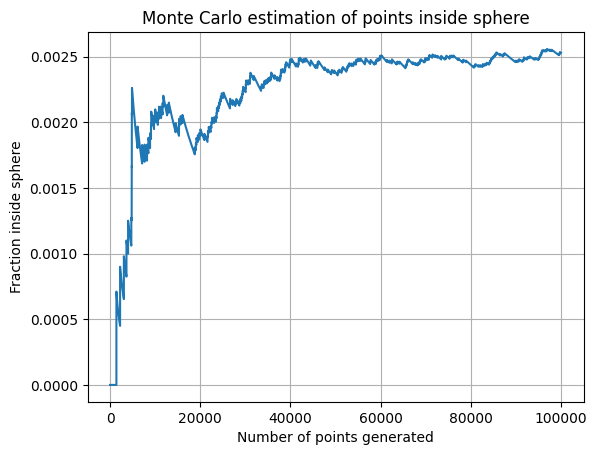

In [9]:
fraction_estimate = dna.monte_carlo_fraction_inside_sphere(sphere, box, plot=True)

We compare the Monte Carlo estimate of the fraction of points inside the sphere with the theoretical expectation. The expected fraction is calculated as the ratio of the sphere’s volume to the simulation box’s volume:


In [47]:
expected_fraction = sphere.get_volume() / box.get_volume()

print("Expected (volume ratio):", expected_fraction)
print("Monte Carlo result:", fraction_estimate)

Expected (volume ratio): 0.029804539295134356
Monte Carlo result: 0.0292


# Task 5


We estimate π by randomly generating points inside a cube and checking how many end up inside a sphere. The sphere is as big as possible so that more random points will end up inside the sphere and it gives better statistical accuracy.


In [20]:
sample_sizes = [10, 100, 1000, 10000, 100000, 1000000]

box = dna.SimulationBox(20, 20, 20)
sphere = dna.Sphere(dna.Point(10, 10, 10), 10)

for sample_size in sample_sizes:
    print(dna.estimate_pi(sample_size, sphere, box))

2.4000000000000004
3.0
3.2220000000000004
3.1362000000000005
3.15564
3.135


# References

(Estimating Pi using the Monte Carlo Method) https://www.101computing.net/estimating-pi-using-the-monte-carlo-method/
